In [1]:
# Import Libaries and Tools
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 30})

ROOT_DIR = os.path.abspath("../../../../")

In [2]:
# Key Varibles
magMethod = 'Uni' # 'FluxImb' 'Homogentiy' 'Skew' 

In [3]:
# Collection of Results
datasetfiles = sorted(glob.glob('Results/CR*.csv.' + magMethod + '.ScaleStats.npz'))

In [4]:
# Open Data Summary
for i in range(len(datasetfiles)-1):
    
    # open and retreave data
    data = np.load(datasetfiles[i], allow_pickle=True)
    lst = data.files
    
    # Get inital list of stats
    if i == 0:
        alphas = data[lst[0]]
        IOU    = data[lst[1]]
        SSIM   = data[lst[2]]
        GCE    = data[lst[3]]
        LCE    = data[lst[4]]
        
    # Get subsequent list of stats
    else:
        alphas = np.vstack([alphas , data[lst[0]]])
        IOU    = np.vstack([IOU    , data[lst[1]]])
        SSIM   = np.vstack([SSIM   , data[lst[2]]])
        GCE    = np.vstack([GCE    , data[lst[3]]])
        LCE    = np.vstack([LCE    , data[lst[4]]])

In [5]:
# File Checks

print('Number of Entries: ',len(alphas))
print()
errorEntry = np.where(alphas!=0.3)[0]
print('List of Entries where alpha paramter was adjusted')
print(errorEntry)

Number of Entries:  1763

List of Entries where alpha paramter was adjusted
[]


In [6]:
# Establish Lables

# Upscale Methods
upscale = ['Nearest-neighbor','Bi-linear','Bi-quadratic','Bi-cubic','Bi-quartic','Bi-quintic']

# Scale Methods
keysFormated = ['Eighth Scale\n'r'($512\times512$)']

In [7]:
# Ensure Folder Exists
saveDirectory = '/Figures/MagScaleConstancy/' + magMethod + '/'
saveDirectory = ROOT_DIR + saveDirectory

if not os.path.exists(saveDirectory):
    os.makedirs(saveDirectory)

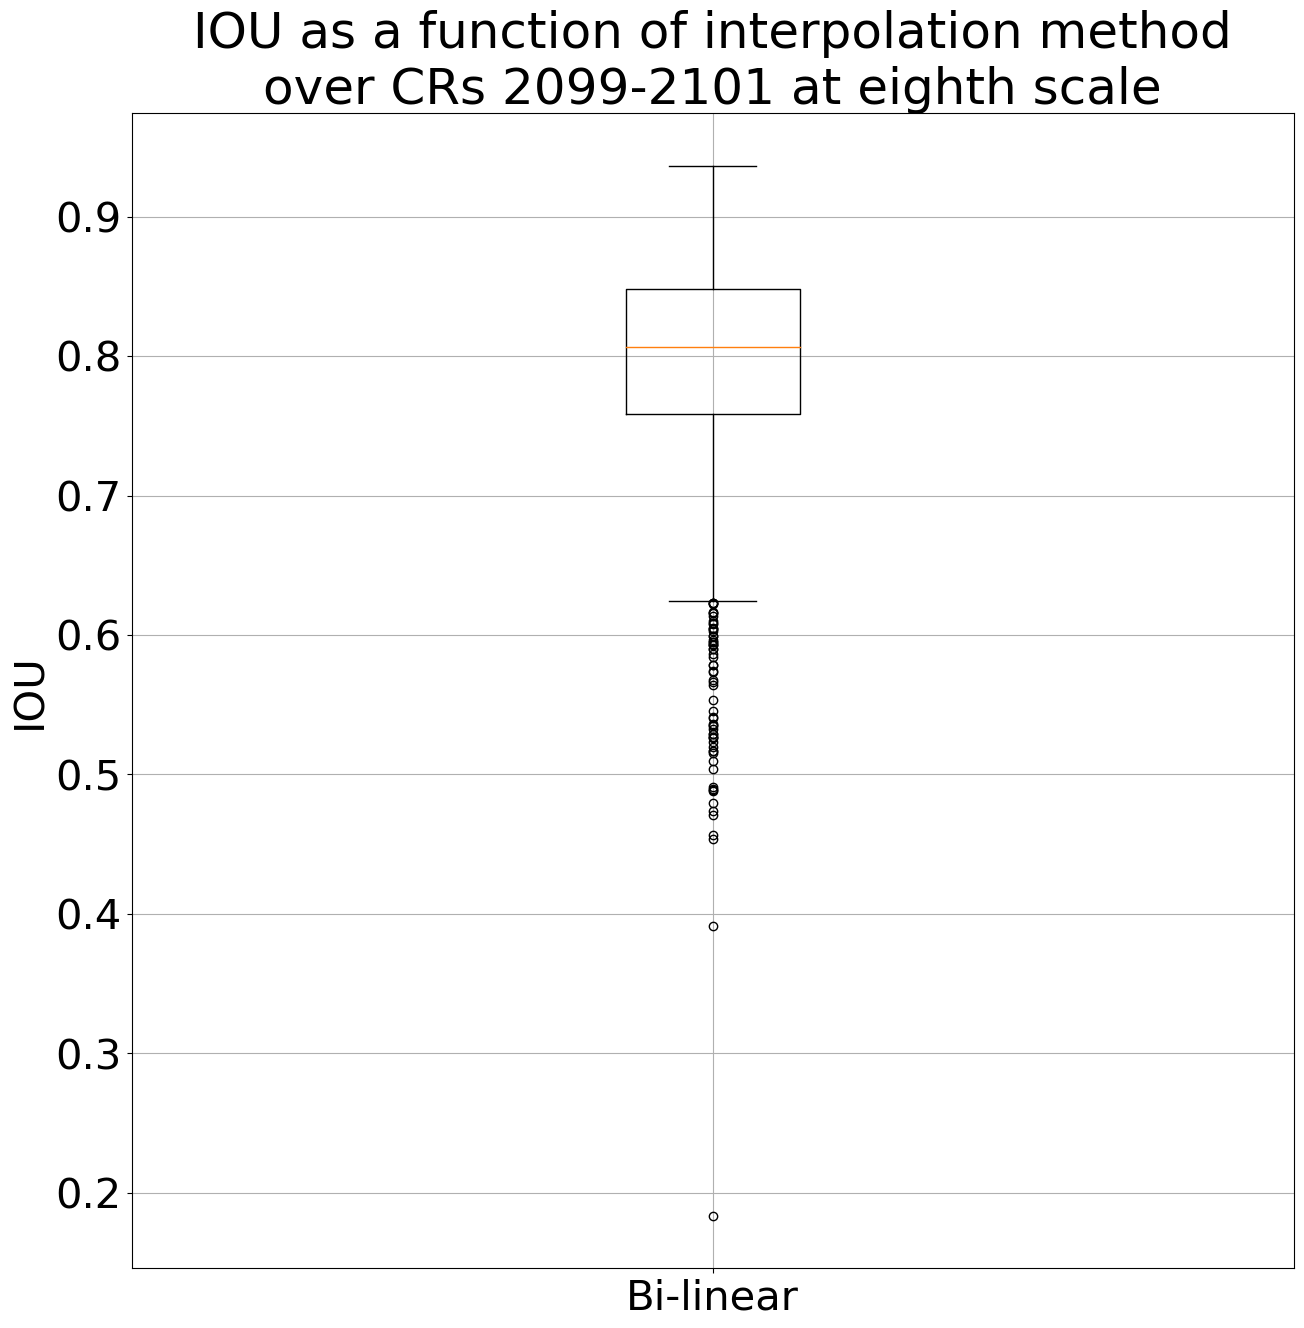

In [8]:
# Plots for 1/8th scale

# Extract Data for 1/8 scale Interploation
IOU8  = IOU[:,0,1]

# Set up lables
x = np.arange(len(upscale)) + 1

# Plot and save results - IOU
plt.figure(figsize=[15,15])
title = 'IOU as a function of interpolation method\nover CRs 2099-2101 at eighth scale'
plt.rcParams.update({'font.size': 30})
plt.title(title)
plt.boxplot(IOU8)
plt.xticks([1],[upscale[1]])
plt.ylabel('IOU')
plt.grid()
title = saveDirectory + 'IOU_Box_earlyData.8.eps'
plt.savefig(title)
plt.show()

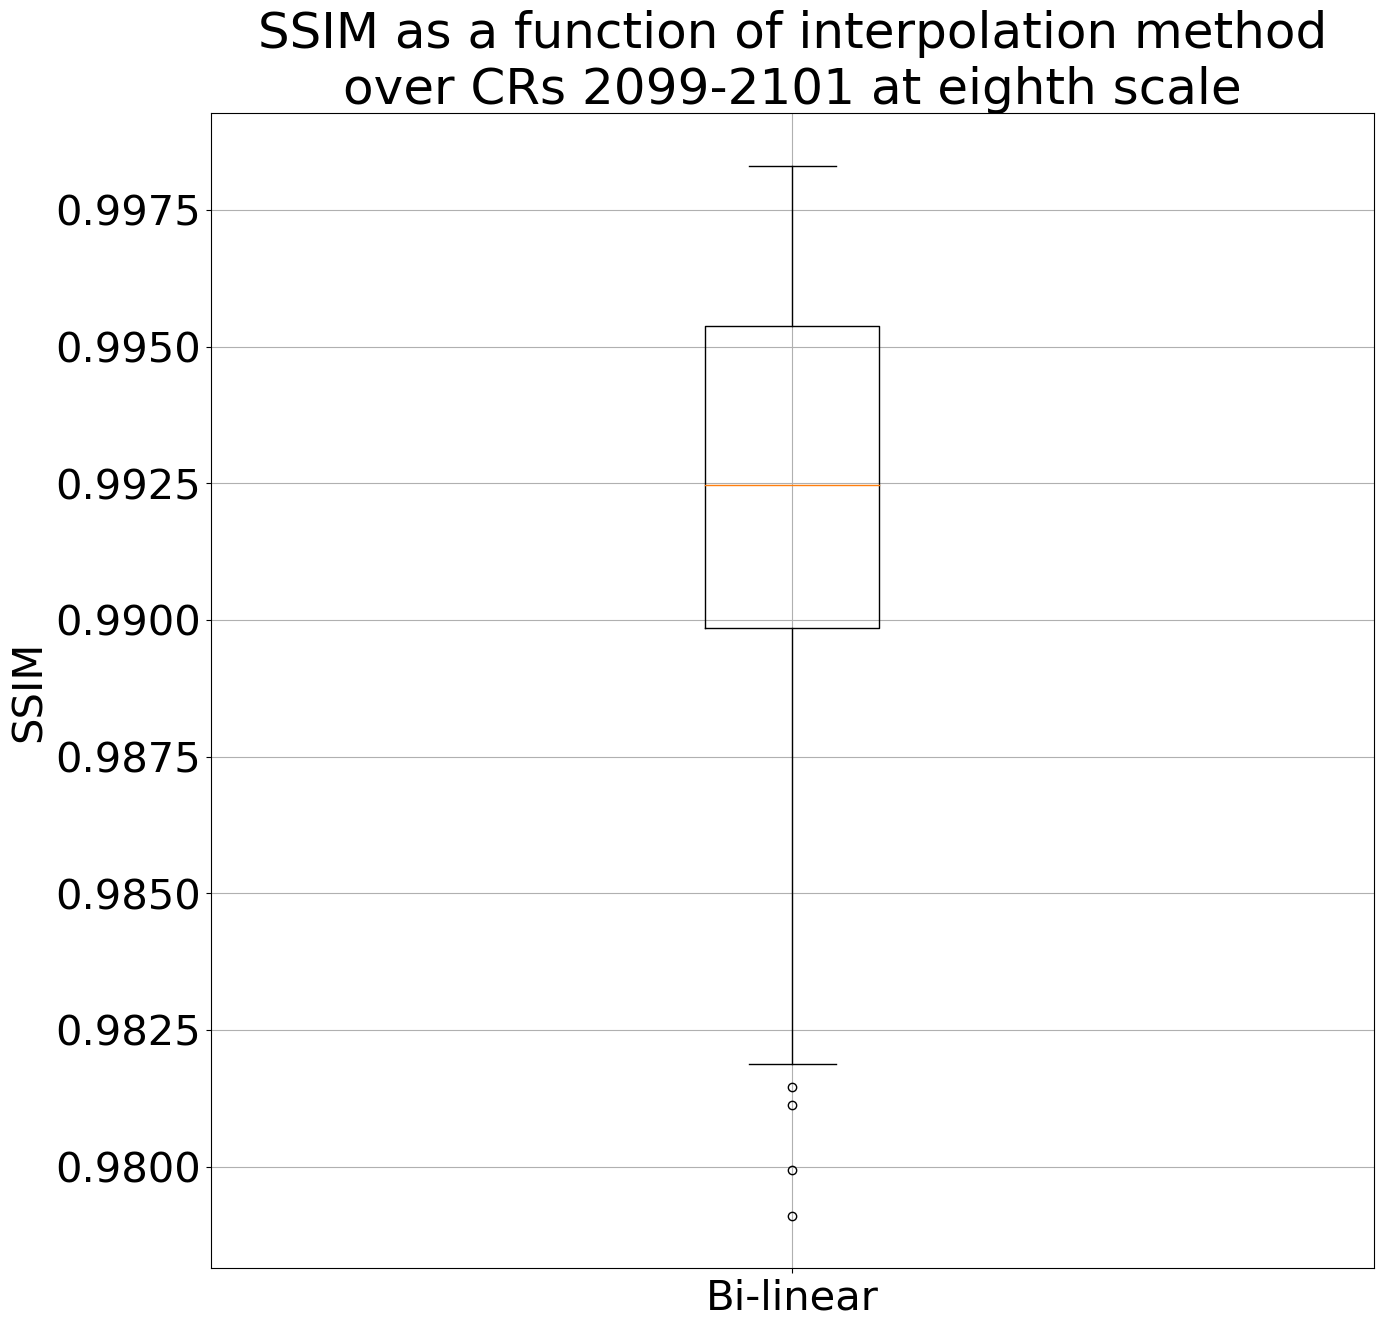

In [9]:
# Plots for 1/8th scale

# Extract Data for 1/8 scale Interploation
SSIM8  = SSIM[:,0,1]

# Set up lables
x = np.arange(len(upscale)) + 1

# Plot and save results - IOU
plt.figure(figsize=[15,15])
title = 'SSIM as a function of interpolation method\nover CRs 2099-2101 at eighth scale'
plt.rcParams.update({'font.size': 30})
plt.title(title)
plt.boxplot(SSIM8)
plt.ylabel('SSIM')
plt.xticks([1],[upscale[1]])
plt.grid()
title = saveDirectory + 'SSIM_Box_earlyData.8.eps'
plt.savefig(title)
plt.show()

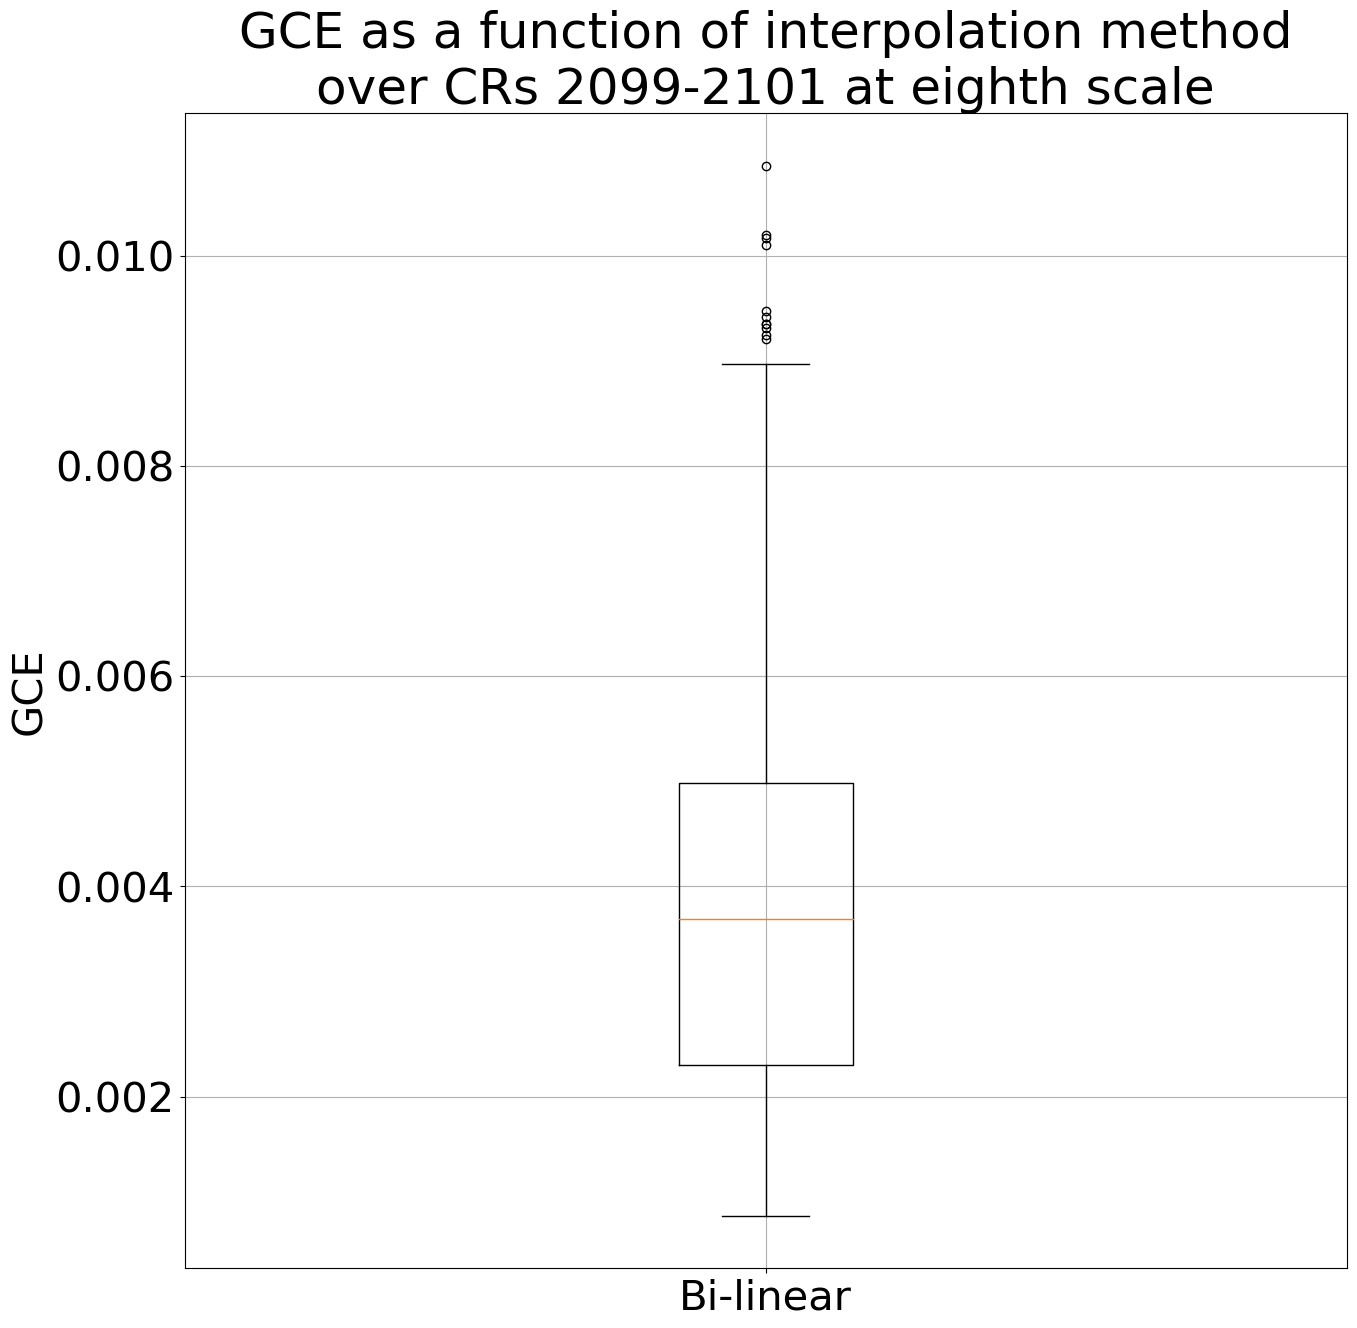

In [10]:
# Plots for 1/8th scale

# Extract Data for 1/8 scale Interploation
GCE8  = GCE[:,0,1]

# Set up lables
x = np.arange(len(upscale)) + 1

# Plot and save results - IOU
plt.figure(figsize=[15,15])
title = 'GCE as a function of interpolation method\nover CRs 2099-2101 at eighth scale'
plt.rcParams.update({'font.size': 30})
plt.title(title)
plt.boxplot(GCE8)
plt.ylabel('GCE')
plt.xticks([1],[upscale[1]])
plt.grid()
title = saveDirectory + 'GCE_Box_earlyData.8.eps'
plt.savefig(title)
plt.show()

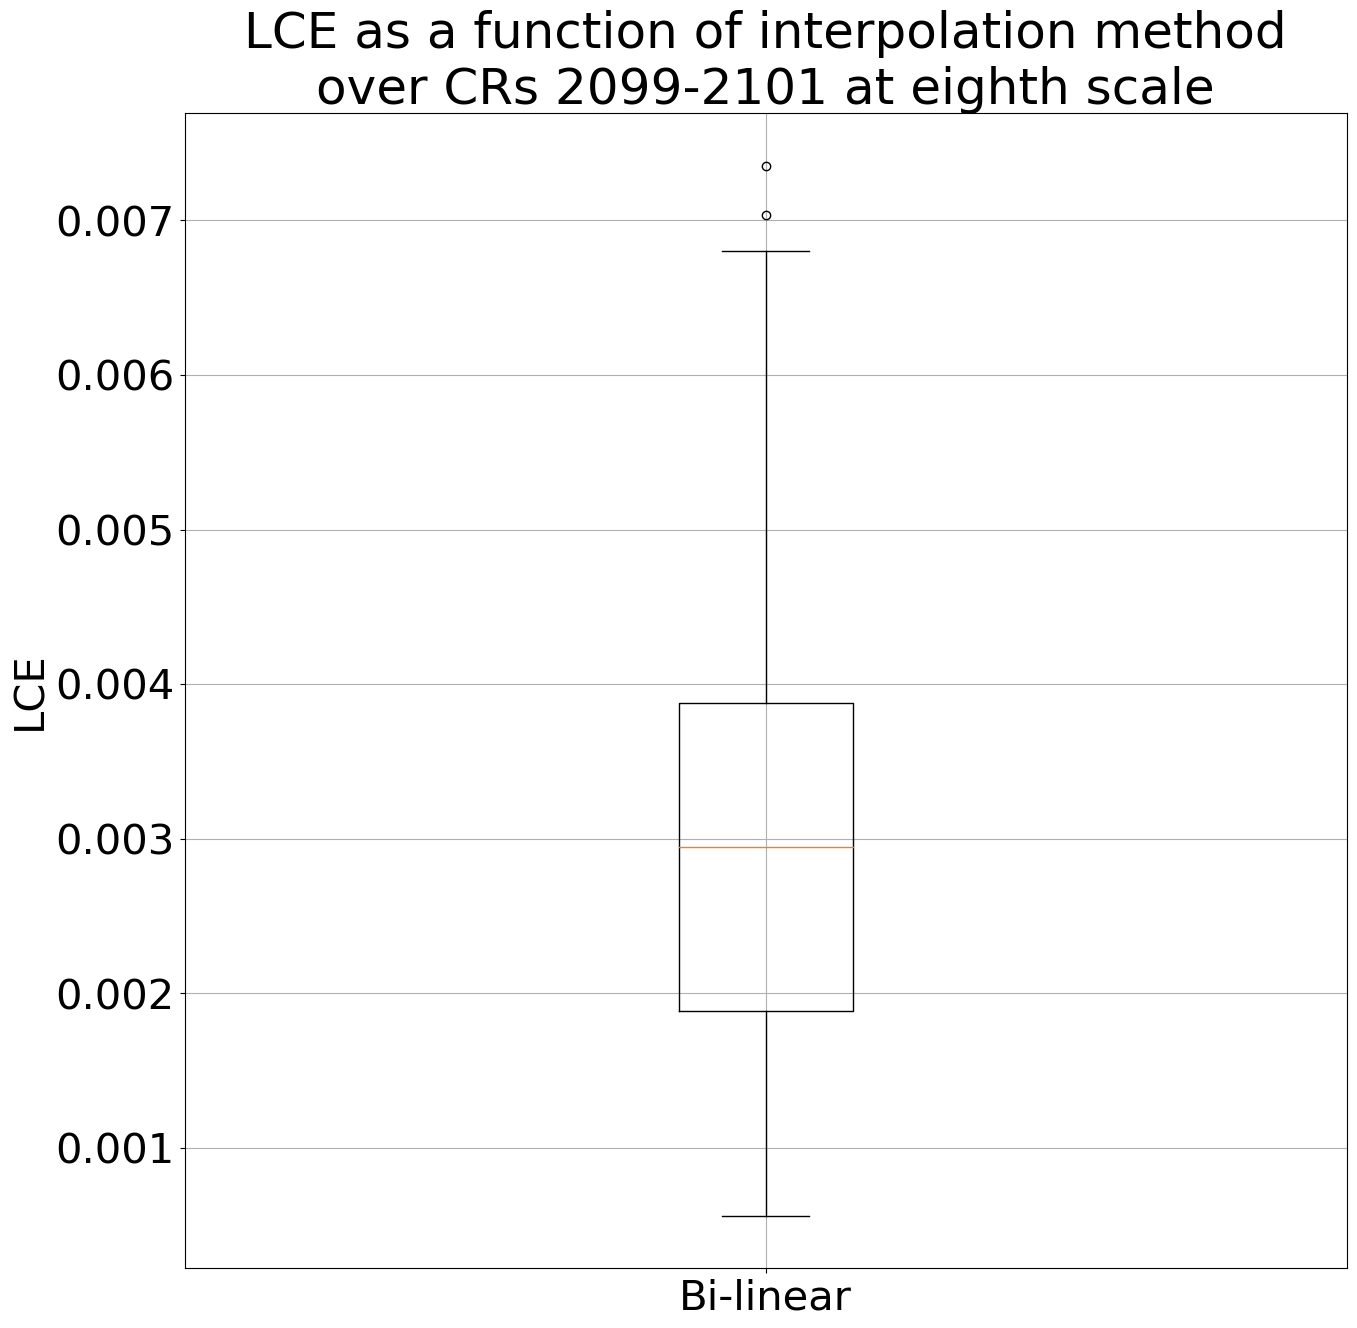

In [11]:
# Plots for 1/8th scale

# Extract Data for 1/8 scale Interploation
LCE8  = LCE[:,0,1]

# Set up lables
x = np.arange(len(upscale)) + 1

# Plot and save results - IOU
plt.figure(figsize=[15,15])
title = 'LCE as a function of interpolation method\nover CRs 2099-2101 at eighth scale'
plt.rcParams.update({'font.size': 30})
plt.title(title)
plt.boxplot(LCE8)
plt.ylabel('LCE')
plt.xticks([1],[upscale[1]])
plt.grid()
title = saveDirectory + 'LCE_Box_earlyData.8.eps'
plt.savefig(title)
plt.show()

In [12]:
# Calculate Stats for full dataset
meanIOUfull  = np.nanmean(IOU,axis=0)
stdIOUfull   = np.nanstd(IOU,axis=0)
meanSSIMfull = np.nanmean(SSIM,axis=0)
stdSSIMfull  = np.nanstd(SSIM,axis=0)
meanGCEfull  = np.nanmean(GCE,axis=0)
stdGCEfull   = np.nanstd(GCE,axis=0)
meanLCEfull  = np.nanmean(LCE,axis=0)
stdLCEfull   = np.nanstd(LCE,axis=0)

In [13]:
# Show Resutls
print('Mean IOU:')
for i in range(len(meanIOUfull)):
    
    print('   ',keysFormated[i])
    
    for j in range(len(meanIOUfull[i])):
        
        print('       ',upscale[j])
        print('           ',meanIOUfull[i,j],'+-',stdIOUfull[i,j])
        
    print('        Range:',np.max(meanIOUfull[i])-np.min(meanIOUfull[i]))

Mean IOU:
    Eighth Scale
($512\times512$)
        Nearest-neighbor
            0.7872631402454947 +- 0.07793826816978745
        Bi-linear
            0.7924740065394605 +- 0.07795322858960063
        Bi-quadratic
            0.791282952682484 +- 0.07798251106488768
        Bi-cubic
            0.791305466656516 +- 0.0780219170800714
        Bi-quartic
            0.7910058572566987 +- 0.07803653468758873
        Bi-quintic
            0.7908578272067143 +- 0.07804721090890107
        Range: 0.005210866293965832
